In [15]:
import pandas as pd

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from os import walk
import math

In [17]:
CRISPResso1to100Path = '/Users/hera.canaj/Box/PipelineSequencing/Pipeline_CRISPResso_OUT_files/mNGPlate3-REDOsorted_CRISPResso_Out/'

In [18]:
Alleles_Frequency_Path = '/Users/hera.canaj/Box/PipelineSequencing/Pipeline_CRISPResso_OUT_files/mNGPlate3-REDOsorted_CRISPResso_Out/CRISPResso_on_mNGplate3_sorted_A6_TWISTNB-C_S102_R1_qual_P/Alleles_frequency_table.txt'

In [19]:
Alleles_Frequency_df = pd.read_csv(Alleles_Frequency_Path, sep = '\t')

In [20]:
Alleles_Frequency_csv_df = pd.read_csv(Alleles_Frequency_Path)
Alleles_Frequency_csv_df.head()

,Aligned_Sequence Reference_Sequence NHEJ UNMODIFIED HDR n_deleted n_inserted n_mutated #Reads %Reads
0,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...
1,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...
2,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...
3,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...
4,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...


In [21]:
Alleles_Frequency_df = pd.read_csv(Alleles_Frequency_Path, sep = '\t')
Alleles_Frequency_df.head()

,Aligned_Sequence,Reference_Sequence,NHEJ,UNMODIFIED,HDR,n_deleted,n_inserted,n_mutated,#Reads,%Reads
0,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...,False,False,True,0.0,90.0,4,12058,11.556893
1,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...,True,False,False,5.0,0.0,0,6849,6.564369
2,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...,False,False,True,0.0,90.0,1,4218,4.042708
3,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...,False,True,False,0.0,0.0,0,3779,3.621952
4,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...,TTTTCTGTTTTGTAAACTACTGGCATACTTAACCTTTTCATATCAC...,True,False,False,0.0,5.0,0,3630,3.479144


In [22]:
Alleles_Frequency_df["#Reads"].head()

0    12058
1     6849
2     4218
3     3779
4     3630
Name: #Reads, dtype: int64

In [23]:
total_reads = sum(Alleles_Frequency_df["#Reads"])
print(total_reads)
#this is the total number of reads within this sample

104336


In [24]:
from os import walk

In [25]:
#Again, go to your best friend for function details:
#Let's put all of the sample subfolder names into one dictionary, where the key/value correspondence are well/foldername
folderdict_1to100 = {}
for (root, folders, files) in walk(CRISPResso1to100Path):
    if root == CRISPResso1to100Path: #We only want to see which subfolders are in the superfolder
        for subfolder in folders: #folders is a list containing all subfolder names; this for loop let's use iterate 
                                    #through each subfolder name
            well = subfolder.split('_')[4] #remember that subfolder is just a string, and we can split strings
                                            #we are taking advantage of the fact that in all subfolder names, sample well
                                            #appears exactly at between the fifth and sixth underscores
            folderdict_1to100[well] = subfolder
            

In [26]:
#Let's take a look at this dictionary to make sure it's what we expected:
#We can use this makeshift way to display just the first five items (key-item pairs) in our dictionary
# see https://stackoverflow.com/questions/28704526/in-python-how-to-obtain-a-partial-view-of-a-dict
dict(list(folderdict_1to100.items())[0:5])

{'A10': 'CRISPResso_on_mNGplate3_sorted_A10_TAF1B-C_S106_R1_qual_P',
 'A11': 'CRISPResso_on_mNGplate3_sorted_A11_TAF1C-C_S107_R1_qual_P',
 'A12': 'CRISPResso_on_mNGplate3_sorted_A12_TAF1D-N_S108_R1_qual_P',
 'A6': 'CRISPResso_on_mNGplate3_sorted_A6_TWISTNB-C_S102_R1_qual_P',
 'A7': 'CRISPResso_on_mNGplate3_sorted_A7_UBTF-N_S103_R1_qual_P'}

In [27]:
#We have everything we need now to open all the Alleles_frequency_table.txt files and sum the total number of reads
#per sample.
for i in range(1, 95): #iterates integers from 1 to 94 inclusive
    sample = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][i//12] + str(i % 12 + 1) # // and % help place our 96 samples 
    #into rectangular grids. "str + str" concatenates the two strings. str() converts some datatypes into strings; 
    #similar functions for other datatypes include float(), int(), list(), set().
    Alleles_Frequency_Path = CRISPResso1to100Path + folderdict_1to100[sample] + '/Alleles_frequency_table.txt'
    #remember that even though foldersdict_1to100 is a dictionary, folderdict_1to100[sample] for every sample returns
    #a string. Print it out to convince yourself of that. Look up python dictionary documentation to see more about 
    #what can and cannot be placed as the key/values in dictionaries. Generally speaking, values can be anything, while
    #keys need to be immutable objects (strings, values YES; lists, other dictionaries NO)
    Alleles_Frequency_df = pd.read_csv(Alleles_Frequency_Path, sep = '\t')
    total_reads = sum(Alleles_Frequency_df["#Reads"])
    print(total_reads)

KeyError: 'A2'

In [28]:
import numpy as np

total_reads_1to100_dict = {} #let's save these total read values into a dictionary as well
total_reads_1to100_array = np.array([np.zeros(12)]*8) #This is to enable later plotting
for i in range(96): #since we are building FileNotFoundError s into our code, we can try iterating from A1 to H12
    row = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][i//12] 
    column = str(i % 12 + 1)
    sample = row + column
    try:
        Alleles_Frequency_Path = CRISPResso1to100Path + folderdict_1to100[sample] + '/Alleles_frequency_table.txt'
    except KeyError:
        print('\n' + sample + ' not found in folders dictionary')
        continue #go on to the next loop. See difference between loop controls [pass], [break], and [continue]
    try:
        Alleles_Frequency_df = pd.read_csv(Alleles_Frequency_Path, sep = '\t')
        total_reads = sum(Alleles_Frequency_df["#Reads"])
        total_reads_1to100_dict[sample] = total_reads
        total_reads_1to100_array[i//12][i%12] = int(total_reads)
        print(total_reads, end='\t') #changing the end parameter of the builtin function print helps with visual formatting
    except FileNotFoundError:
        print('\n' + sample + ' not found in CRISPResso output files')


A1 not found in folders dictionary

A2 not found in folders dictionary

A3 not found in folders dictionary

A4 not found in folders dictionary

A5 not found in folders dictionary
104336	64495	94456	112525	116546	38025	115702	63431	80865	88824	77254	75797	72172	85645	132920	64185	67950	46936	136094	31930	54705	63670	60937	42930	77654	84522	64227	62047	69312	31491	73854	81952	59504	83945	80288	
D5 not found in folders dictionary
114119	118450	119845	57667	50576	33731	53539	57880	52538	56440	58429	71023	77848	113296	84714	40800	27363	5748	65953	55012	71418	69109	66984	
F5 not found in folders dictionary

F6 not found in folders dictionary
59748	69989	17446	416	11468	4813	75528	105726	89947	75454	93566	47415	87625	74489	45313	22591	26781	47936	86309	70080	66771	133282	88142	68573	93973	
H8 not found in CRISPResso output files
74741	86473	
H11 not found in folders dictionary

H12 not found in folders dictionary


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline 
#This allows matplotlib to plot its outputs on the Jupyter notebook interface itself

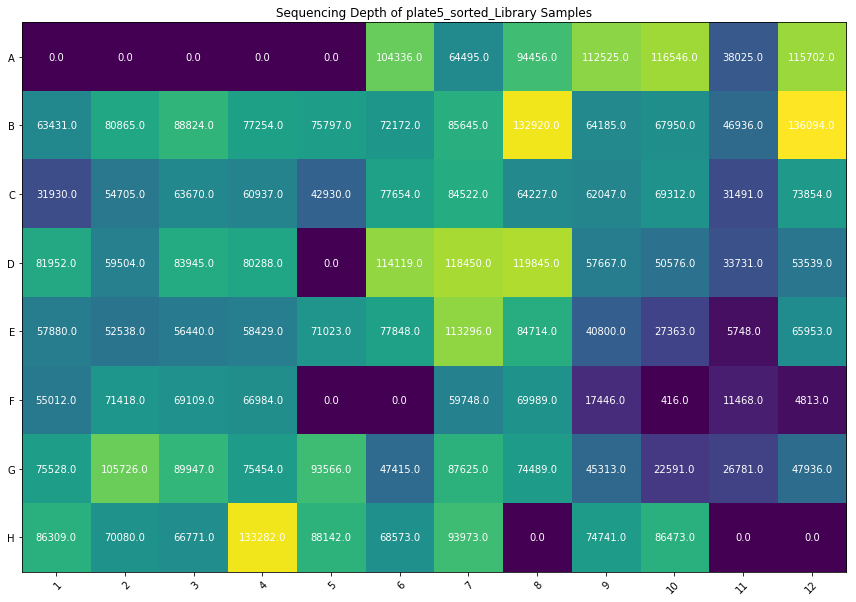

In [30]:
#adapted from https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
rows = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
columns = [str(number) for number in range(1, 13)]

sequencing_depth = total_reads_1to100_array


fig, ax = plt.subplots(figsize = (12, 16))
im = ax.imshow(sequencing_depth)

# We want to show all ticks...
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(rows)))
# ... and label them with the respective list entries
ax.set_xticklabels(columns)
ax.set_yticklabels(rows)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(rows)):
    for j in range(len(columns)):
        text = ax.text(j, i, sequencing_depth[i, j],
                       ha="center", va="center", color="w")

        
ax.set_title("Sequencing Depth of plate5_sorted_Library Samples") #CHANGE TITLE
fig.tight_layout()
plt.show()


In [231]:
fig.savefig('/Users/hera.canaj/Desktop/Plate5_sorted_SequencingDepth.png')

In [232]:
PATH = '/Users/hera.canaj/Box/PipelineSequencing/Pipeline_CRISPResso_OUT_files/Plate5_CRISPRessoOut/'

In [233]:
def make_uppercase(primersequence):
    upper_dict={'a':'A', 't':'T', 'c':'C', 'g':'G'}
    for i, j in upper_dict.items():
        primersequence=primersequence.replace(i, j)
    return primersequence

def make_reverse_complement(sequence):
    revcomp_dict={'A':'t', 'T':'a', 'C':'g', 'G':'c'}
    sequence=sequence[::-1]
    for i, j in revcomp_dict.items():
        sequence=sequence.replace(i, j)
    sequence=make_uppercase(sequence)
    return sequence

In [234]:
CRISPRessofolders = []
for (dirpath, dirnames, filenames) in walk(PATH):
    CRISPRessofolders.extend(dirnames)
    break

foldersdict={}
for item in CRISPRessofolders:
    foldersdict['{}'.format(item.split('_')[4])] = item ##change string 

IndexError: list index out of range

In [235]:
xindices = ['A', 'B', 'C', 'D', 'E','F','G','H']
def slotting(samplenumber):
    well = '{}{}'.format(xindices[samplenumber//12], samplenumber%12+1)
    with open(PATH + '{}/Alleles_frequency_table.txt'.format(foldersdict[well]), 'r') as file:
        next(file)
        NHEJreads=[]
        UNMODIFIEDreads=[]
        HDRreads=[]
        MIXEDreads=[]
        for line in file:
            if line.split('\t')[2]=='True':
                NHEJreads.append([line.split('\t')[0].replace('-',''), int(line.split('\t')[8])])
            elif line.split('\t')[2]=='False' and line.split('\t')[3]=='True':
                UNMODIFIEDreads.append([line.split('\t')[0].replace('-',''), int(line.split('\t')[8])])
            elif line.split('\t')[2]=='False' and line.split('\t')[3]=='False' and line.split('\t')[4]=='True':
                HDRreads.append([line.split('\t')[0].replace('-',''), int(line.split('\t')[8])])
            elif line.split('\t')[2]=='False' and line.split('\t')[3]=='False' and line.split('\t')[4]=='False':
                MIXEDreads.append([line.split('\t')[0].replace('-',''), int(line.split('\t')[8])])
            else:
                print(samplenumber, line)
        file.close()
    return [NHEJreads, UNMODIFIEDreads, HDRreads, MIXEDreads]
def get_pass_ratios(samplenumber):
    [sN, sU, sH, sM]=slotting(samplenumber)
    sUnum=sum([n for _,n in sU])
    sNnum=sum([n for _,n in sN])
    sHnum=sum([n for _,n in sH])
    sMnum=sum([n for _,n in sM])
    return [['{}{}'.format(xindices[samplenumber//12], samplenumber%12+1)], [sUnum, sNnum, sHnum, sMnum]]

In [236]:
quantdf = get_pass_ratios(0)
quantdf

KeyError: 'A1'

In [237]:
def plot_bars(n):
    quantdf = get_pass_ratios(n)
    data0=quantdf[1][0]/np.sum(quantdf[1])
    data1=quantdf[1][1]/np.sum(quantdf[1])
    data2=quantdf[1][2]/np.sum(quantdf[1])
    data3=quantdf[1][3]/np.sum(quantdf[1])
    bottom1=data0
    bottom2=data0+data1
    bottom3=bottom2 + data2
    ind=np.arange(1)
    #fig, ax =plt.subplots()
    global p0, p1, p2, p3
    p0=plt.bar(np.arange(1), data0, width=0.35)
    p1=plt.bar(np.arange(1), data1, bottom=bottom1, width=0.35)
    p2=plt.bar(np.arange(1), data2, bottom=bottom2, width=0.35)
    p3=plt.bar(np.arange(1), data3, bottom=bottom3, width=0.35)
    
    ax = plt.gca()
    ax.set_xlim(-0.5, 0.5)
    plt.ylabel('percent of reads')
    plt.xticks(ind, ('sample', 'sample'))
    #plt.legend((p3[0], p2[0], p1[0], p0[0]), ('MIX', 'HDR', 'NHEJ','UNMODIFIED'))
    plt.title('{}'.format(quantdf[0][0]))

KeyError: 'A1'

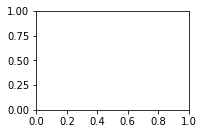

In [238]:
f = plt.figure()
f.add_subplot(2, 2, 1)
plot_bars(0)

not found in folders dictionary
not found in CRISPResso output files
not found in folders dictionary
not found in folders dictionary


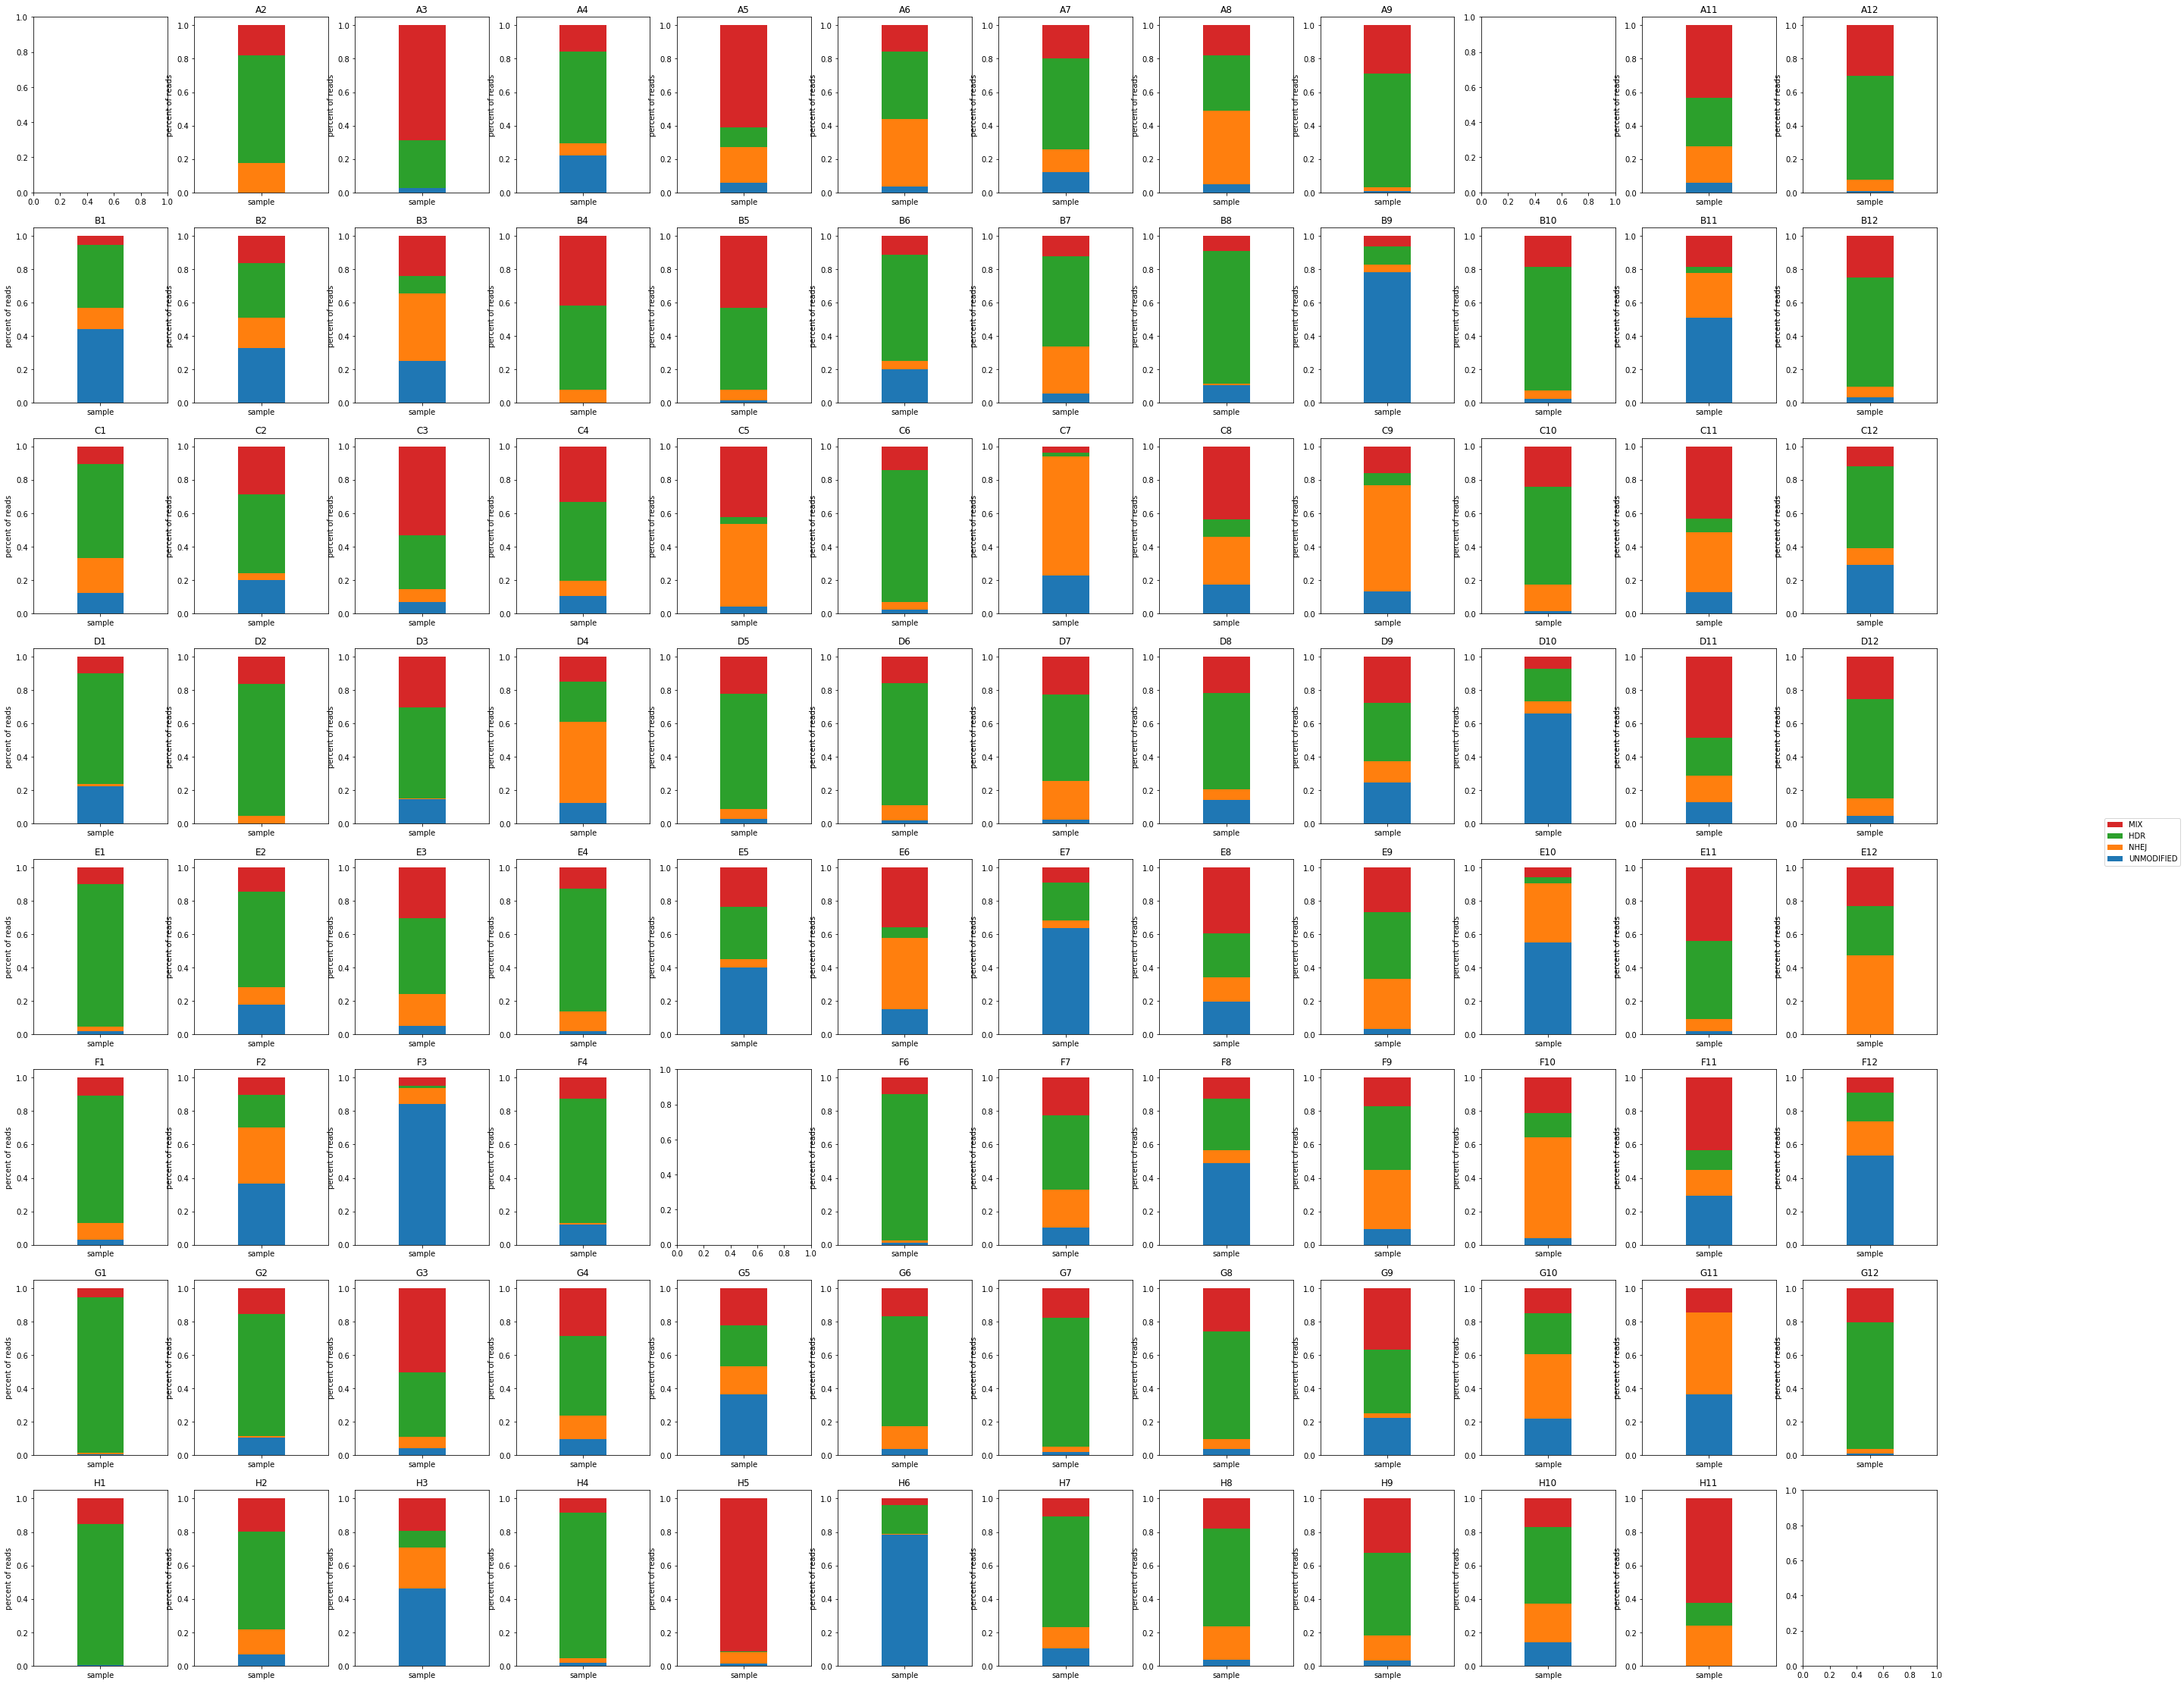

In [239]:
f=plt.figure(figsize=(45, 40))

for i in range(96):
    try:
        f.add_subplot(8, 12, i+1)
        plot_bars(i)

    except KeyError:
        print('not found in folders dictionary')
        continue #go on to the next loop. See difference between loop controls [pass], [break], and [continue]

        
        
    except FileNotFoundError:
        print('not found in CRISPResso output files')
plt.figlegend((p3[0], p2[0], p1[0], p0[0]), ('MIX', 'HDR', 'NHEJ','UNMODIFIED'),5)



In [240]:
f.savefig("/Users/hera.canaj/Desktop/Plate5_sorted_RepairProfile.png")